In [77]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# IMPORT ANNDATA OBJECT
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/Test'
# sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
# anndata = sdata.table
name_anndata = "anndataNucA11"
short_name = "A11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) 

In [3]:
# GENERATE UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)

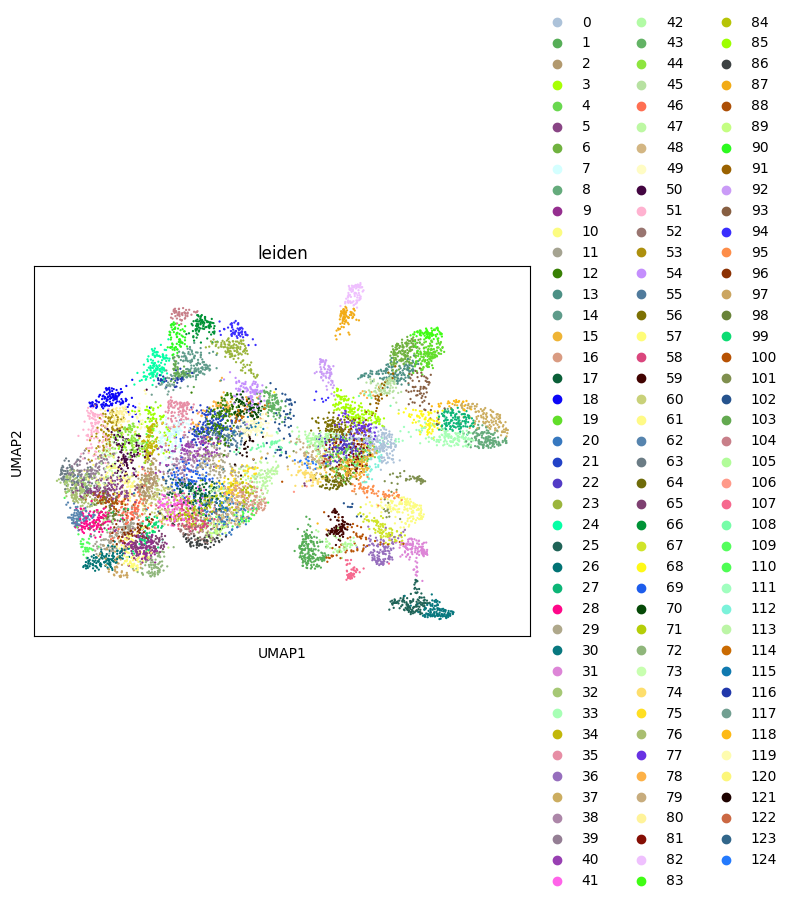

In [4]:
# LEIDEN OVERCLUSTERING
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

In [5]:
# PART 1
# Apply the original and new score genes functions based on a list of marker genes

Hepa             8.669
LSEC             9.333
Portal vein      6.000
Central vein     8.500
Chol             7.500
Kupf            19.500
Stel            16.001
Fibr            17.625
B cell           4.500
Meso             6.000
Portal LAM      13.500
Oth im           4.000
dtype: float64


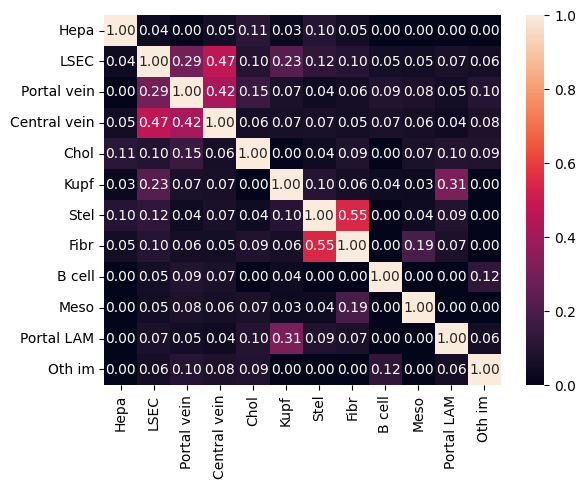

In [6]:
# IMPORT MARKER GENES
path_mg_Martin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListHL_othIm_endoSplit_portalLAM.csv"
Jaccard_similarity_matrix(path_mg_Martin)

In [7]:
# ORIGINAL SCORE GENES
mg_dict, scoresper_cluster = score_genes_bins(
    anndata,
    path_marker_genes = path_mg_Martin,
    bins = 25,
    suffix = '_Martin'
    )

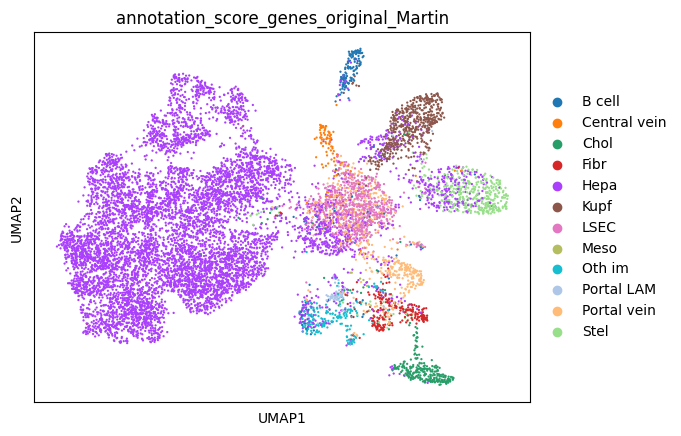

Cell type proportions:
              annotation_score_genes_original_Martin
B cell                                      1.763715
Central vein                                0.921741
Chol                                        2.384118
Fibr                                        2.020739
Hepa                                       70.220686
Kupf                                        4.839139
LSEC                                        7.152353
Meso                                        0.053177
Oth im                                      1.675086
Portal LAM                                  0.646991
Portal vein                                 4.511212
Stel                                        3.811043


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
Meso
[]
Portal LAM
[(59, 0.6, 93)]
Hepa
[(2, 1.0, 164), (5, 1.0, 148), (7, 0.99, 141), (9, 1.0, 139), (11, 1.0, 133), (12, 1.0, 133), (14, 1.0, 

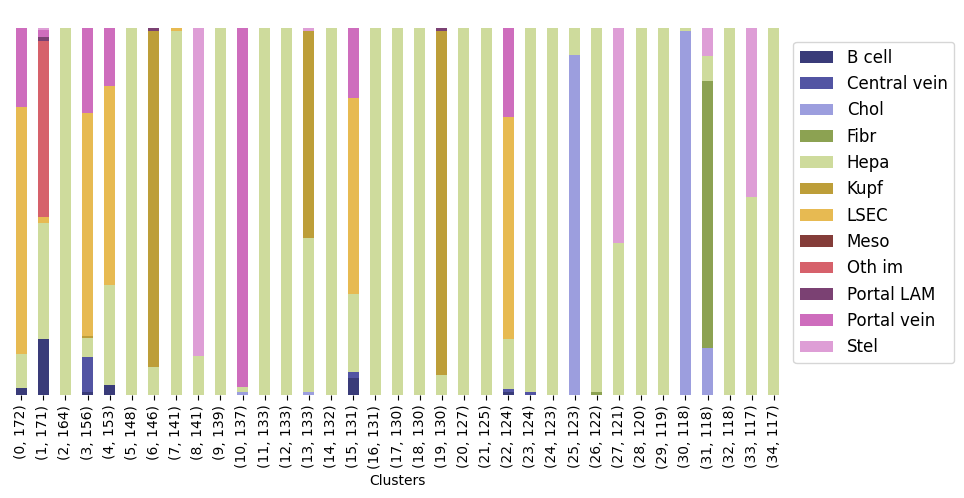

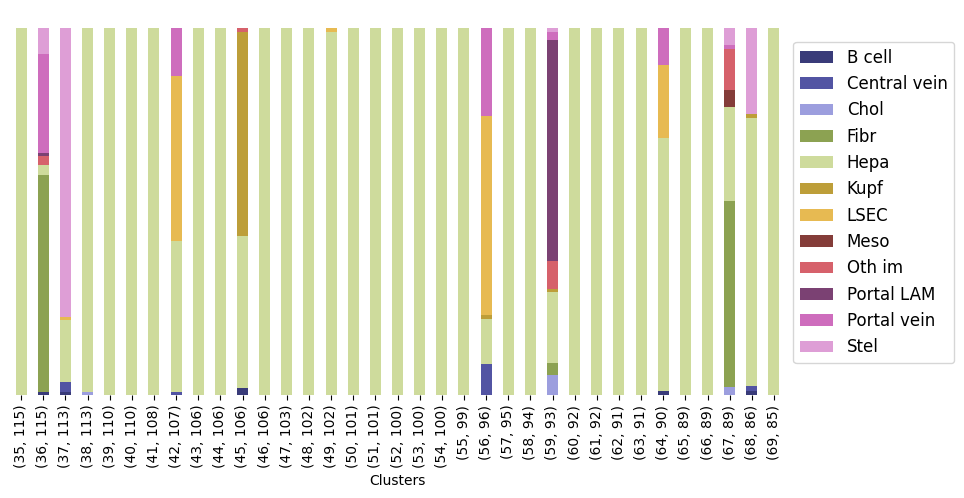

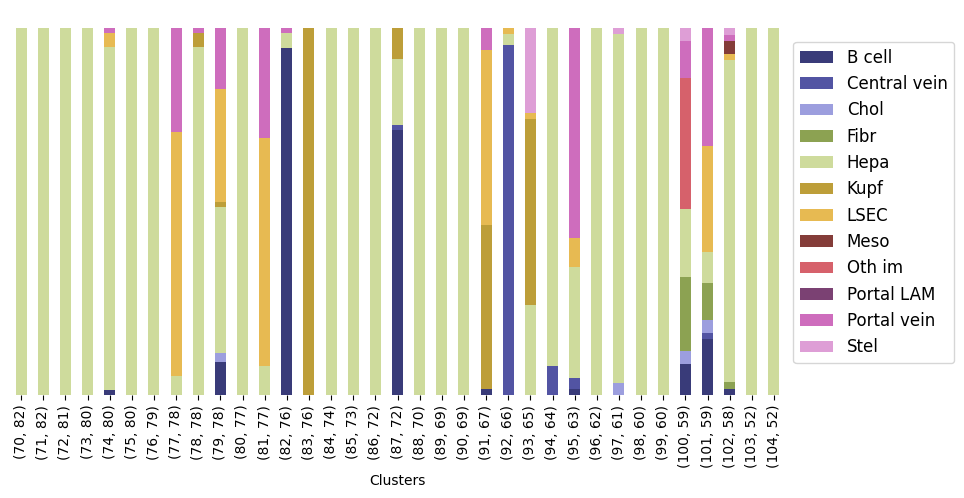

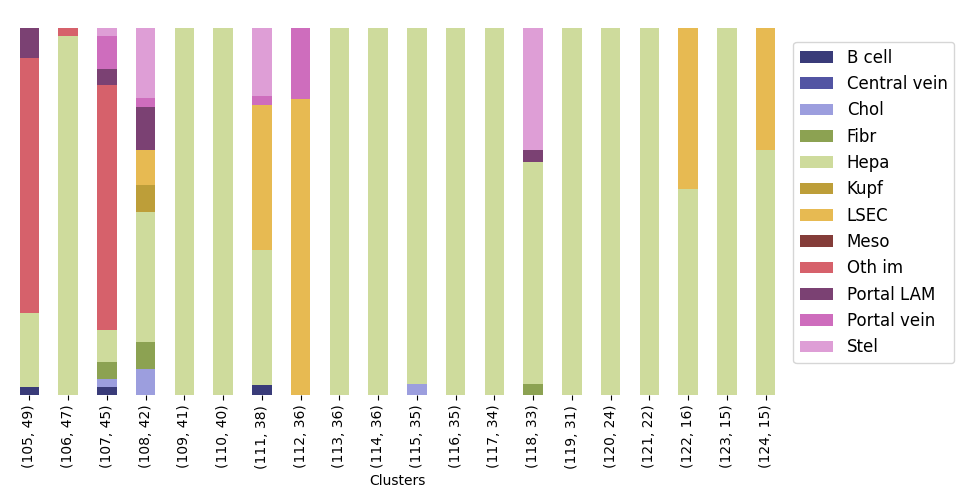

Fraction of cells in a Leiden cluster with unknown cell type:
5.504
Average cluster homogeneity:
0.87
Average cluster homogeneity per cell_type:
B cell: 0.835
Central vein: 0.95
Chol: 0.96
Fibr: 0.61
Hepa: 0.969
Kupf: 0.748
LSEC: 0.621
Meso: nan
Oth im: 0.68
Portal LAM: 0.6
Portal vein: 0.775
Stel: 0.757
Unknown: 0.405


Correlation between cell type scores:


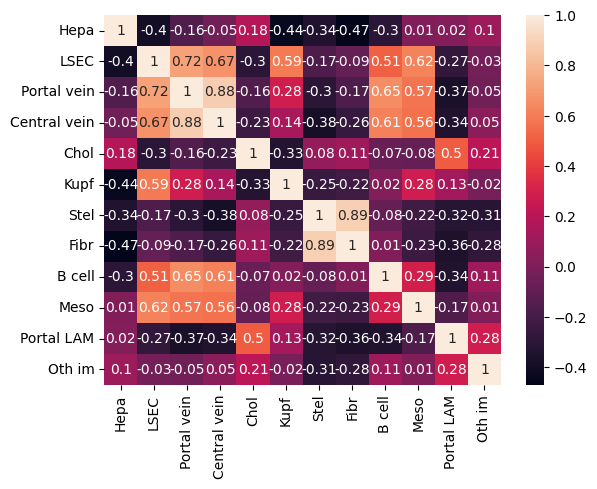

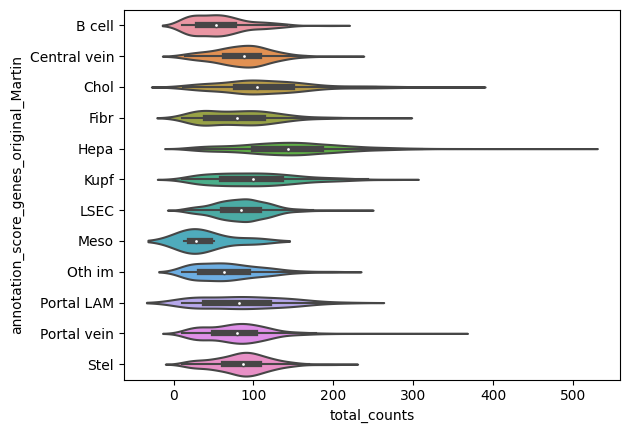

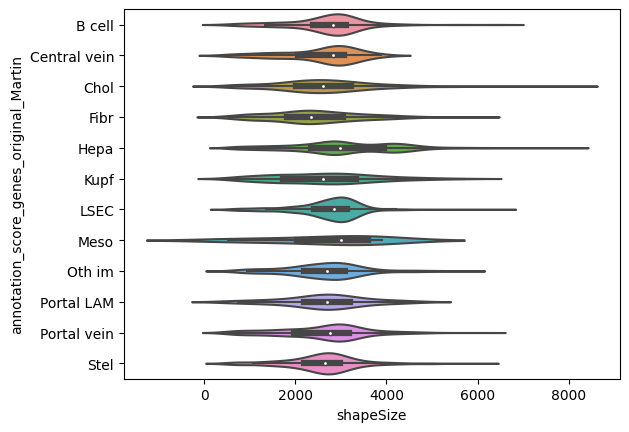

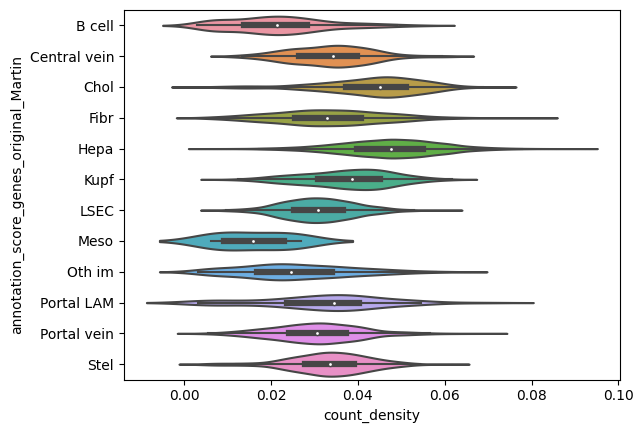

In [8]:
visualize_classification(anndata,'score_genes_original_Martin','umap_15',path_mg_Martin,plot_dot_plot=False,plot_rank_genes_groups=False)

Hepa            63.653284
LSEC            12.753700
Stel             6.363556
Kupf             4.972082
Chol             2.277763
Fibr             2.251174
Oth im           1.816893
Portal vein      1.710538
B cell           1.559869
Portal LAM       1.178765
Unknown          0.576088
Central vein     0.496322
Meso             0.389967
Name: annotation_own_score_genes_Martin, dtype: float64


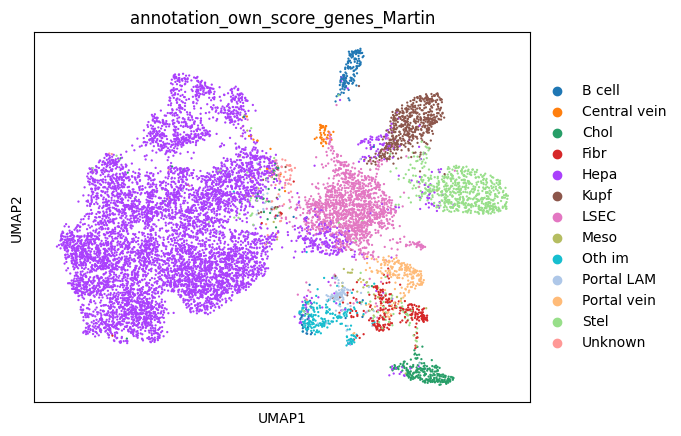

Percentage of cells with changed annotation: 4.75


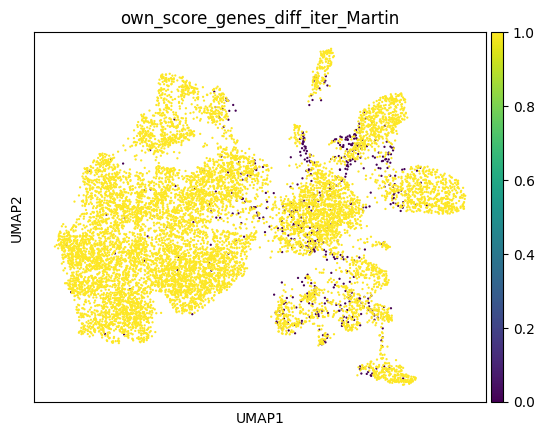

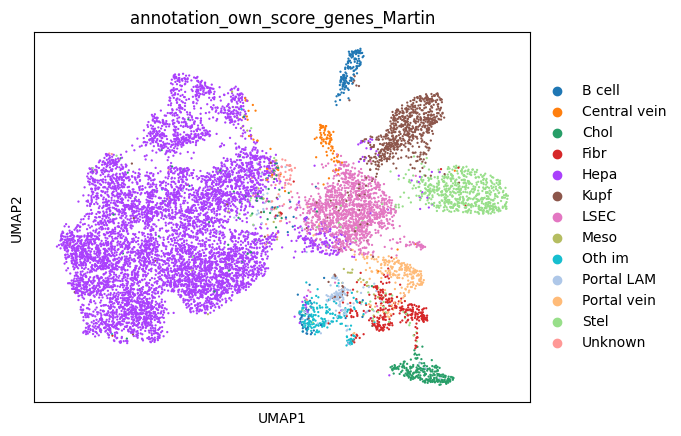

Hepa            61.650270
LSEC            12.018080
Kupf             6.381282
Stel             6.009040
Fibr             2.729770
Chol             2.605690
Portal vein      1.843481
B cell           1.745990
Oth im           1.683949
Portal LAM       1.391474
Central vein     0.966055
Unknown          0.576088
Meso             0.398830
Name: annotation_own_score_genes_Martin, dtype: float64
Percentage of cells with changed annotation: 0.66


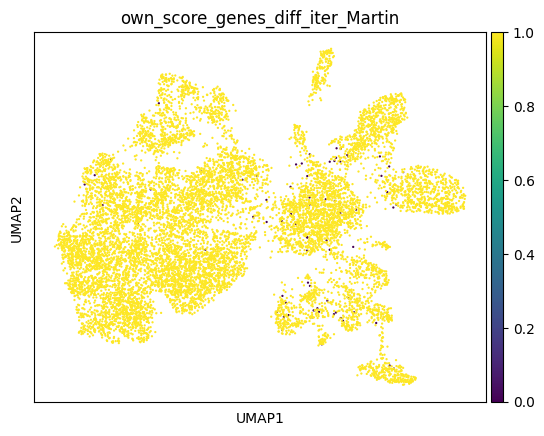

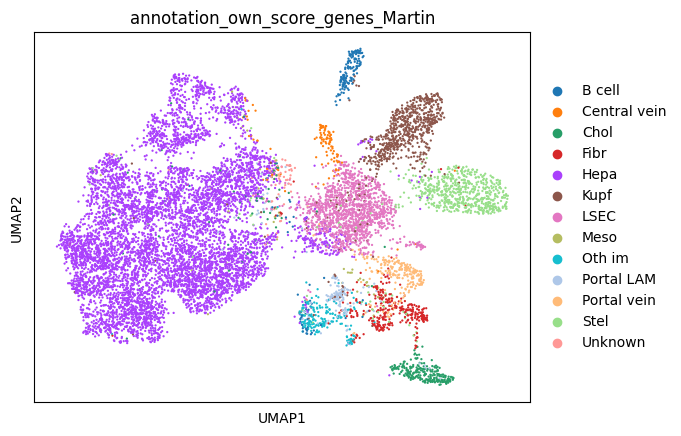

Hepa            61.419835
LSEC            11.867411
Kupf             6.567402
Stel             6.044492
Fibr             2.800674
Chol             2.614553
Portal vein      1.870070
B cell           1.754852
Oth im           1.568732
Portal LAM       1.488966
Central vein     1.019232
Unknown          0.576088
Meso             0.407693
Name: annotation_own_score_genes_Martin, dtype: float64
Percentage of cells with changed annotation: 0.12


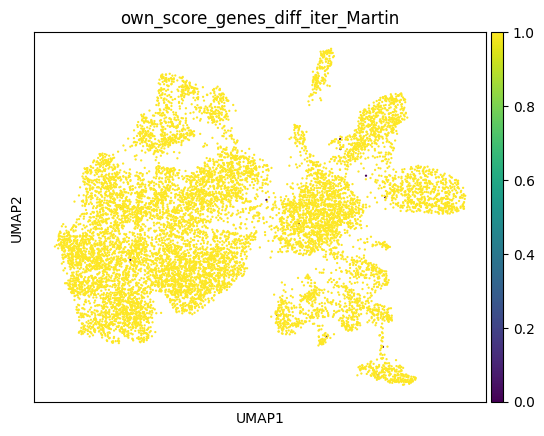

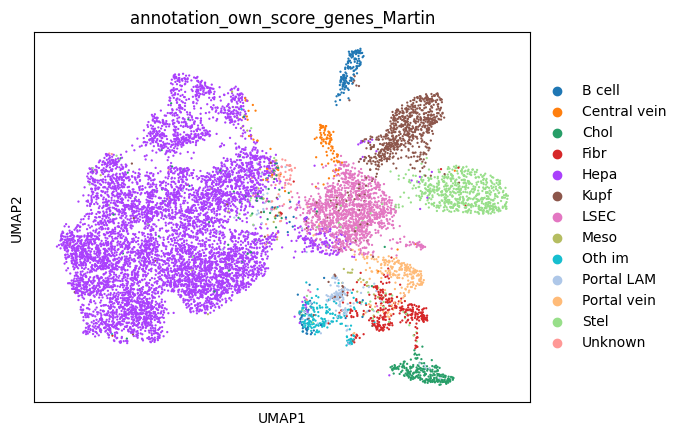

Hepa            61.357795
LSEC            11.867411
Kupf             6.593991
Stel             6.071080
Fibr             2.818399
Chol             2.596827
Portal vein      1.878933
B cell           1.745990
Oth im           1.551006
Portal LAM       1.515554
Central vein     1.019232
Unknown          0.576088
Meso             0.407693
Name: annotation_own_score_genes_Martin, dtype: float64
Percentage of cells with changed annotation: 0.02
converged


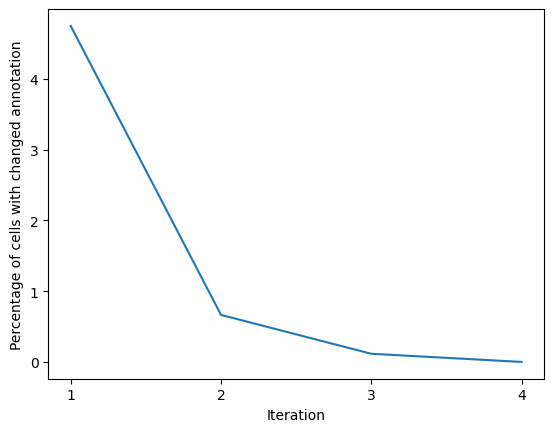

In [9]:
# NEW SCORE GENES
scores = own_score_genes_iterative(anndata,path_mg_Martin,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_Martin')

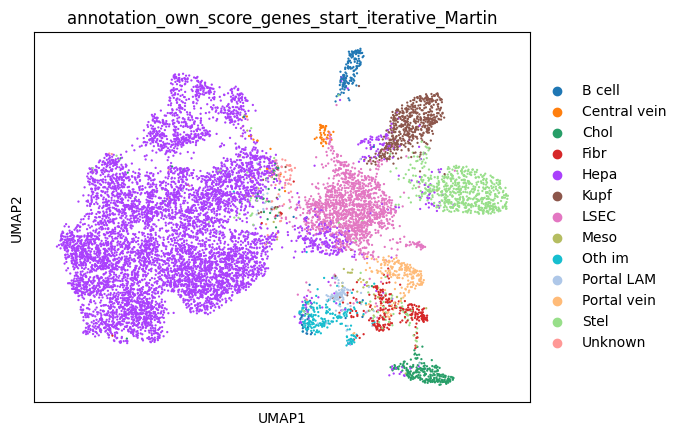

Cell type proportions:
              annotation_own_score_genes_start_iterative_Martin
B cell                                                 1.559869
Central vein                                           0.496322
Chol                                                   2.277763
Fibr                                                   2.251174
Hepa                                                  63.653284
Kupf                                                   4.972082
LSEC                                                  12.753700
Meso                                                   0.389967
Oth im                                                 1.816893
Portal LAM                                             1.178765
Portal vein                                            1.710538
Stel                                                   6.363556
Unknown                                                0.576088


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 

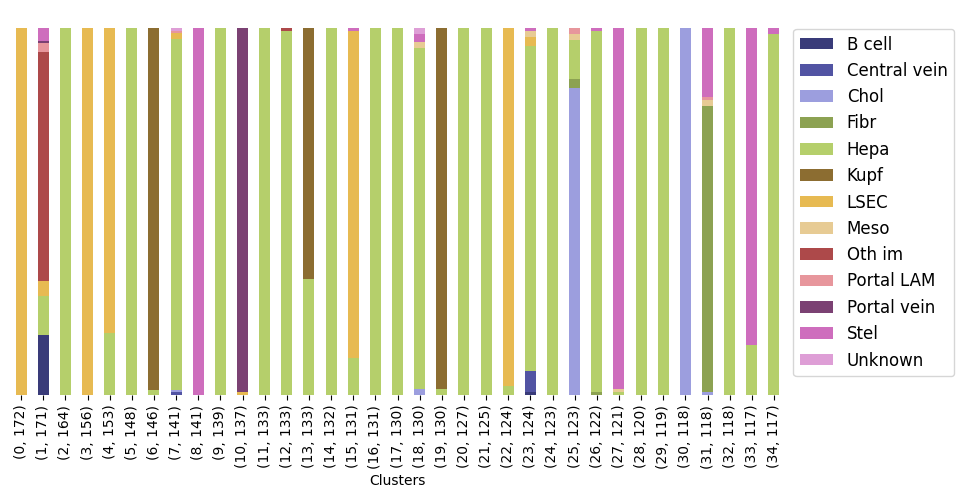

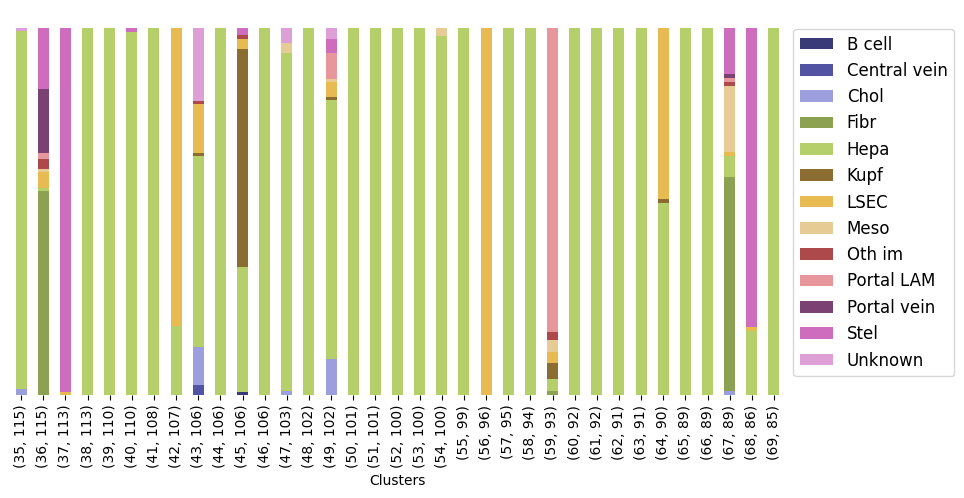

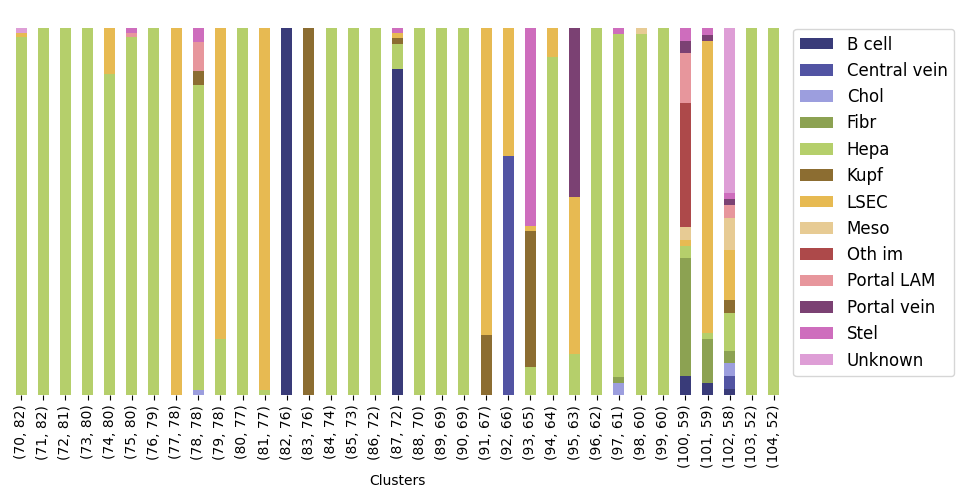

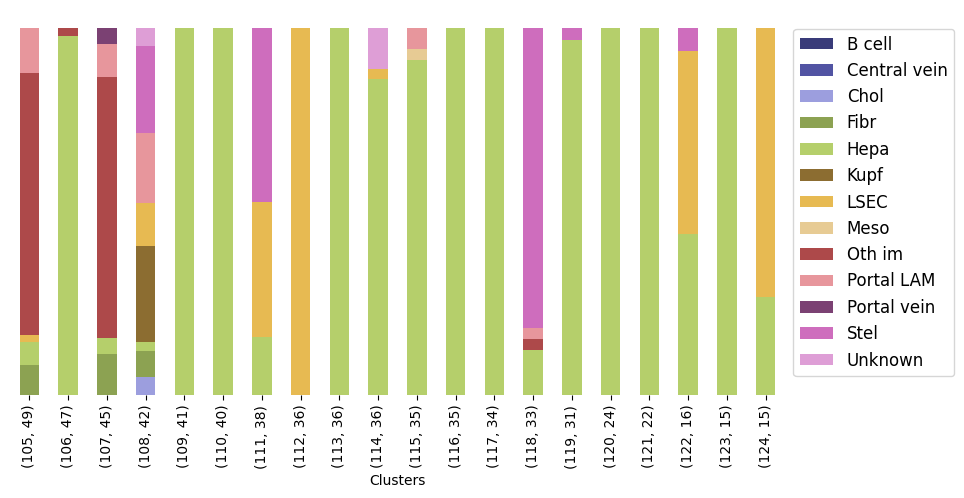

Fraction of cells in a Leiden cluster with unknown cell type:
2.446
Average cluster homogeneity:
0.905
Average cluster homogeneity per cell_type:
B cell: 0.945
Central vein: 0.65
Chol: 0.92
Fibr: 0.64
Hepa: 0.97
Kupf: 0.848
LSEC: 0.909
Meso: nan
Oth im: 0.683
Portal LAM: 0.83
Portal vein: 0.99
Stel: 0.857
Unknown: 0.413


Correlation between cell type scores:


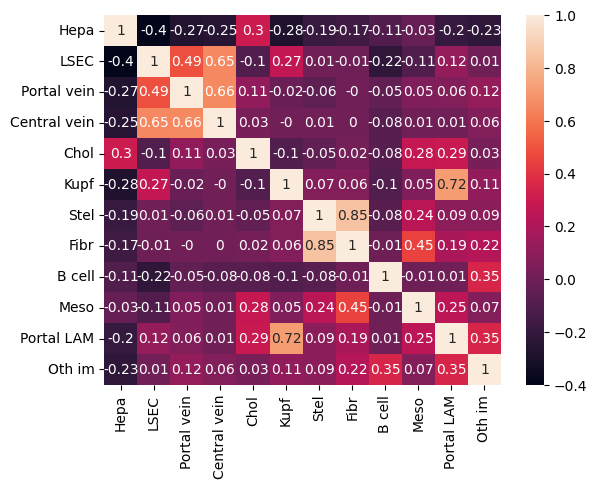

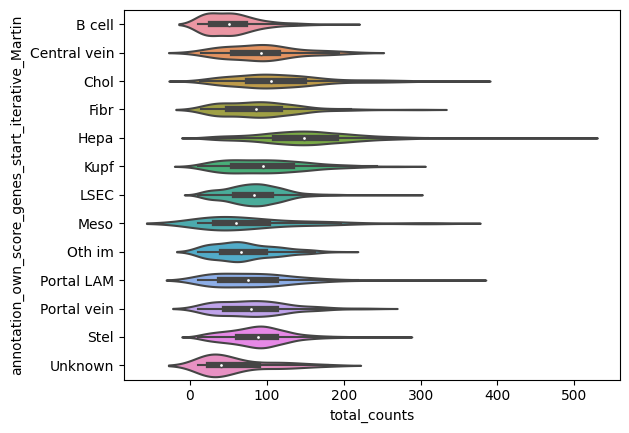

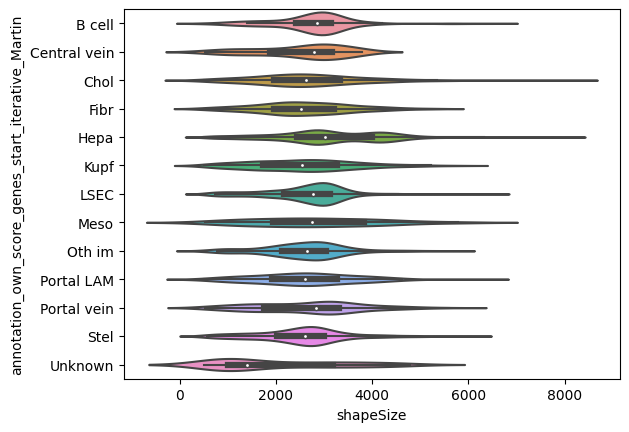

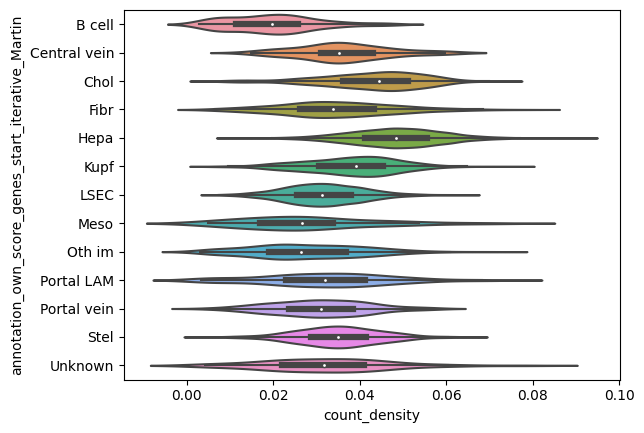

In [10]:
# ANNOTATION AT THE START OF THE ITERATIVE PROCESS
visualize_classification(anndata,'own_score_genes_start_iterative_Martin','umap_15',path_mg_Martin,plot_dot_plot=False,plot_rank_genes_groups=False)

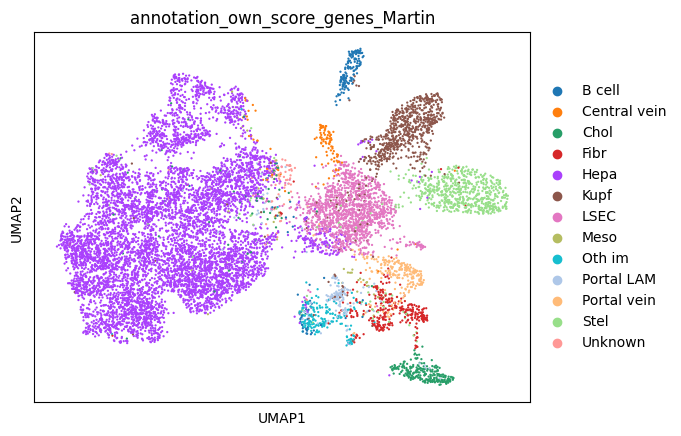

Cell type proportions:
              annotation_own_score_genes_Martin
B cell                                 1.737127
Central vein                           1.019232
Chol                                   2.587964
Fibr                                   2.818399
Hepa                                  61.357795
Kupf                                   6.593991
LSEC                                  11.885137
Meso                                   0.407693
Oth im                                 1.551006
Portal LAM                             1.515554
Portal vein                            1.878933
Stel                                   6.071080
Unknown                                0.576088


Leiden clusters
Only a cell type assigned to a Leiden cluster, if more than 50 percent of cells have the same cell type, otherwise 'Unknown':
Meso
[]
Kupf
[(6, 1.0, 146), (13, 0.94, 133), (19, 1.0, 130), (45, 0.88, 106), (83, 1.0, 76), (91, 0.75, 67), (93, 0.82, 65)]
Fibr
[(31, 0.9, 118), (36, 0.68, 11

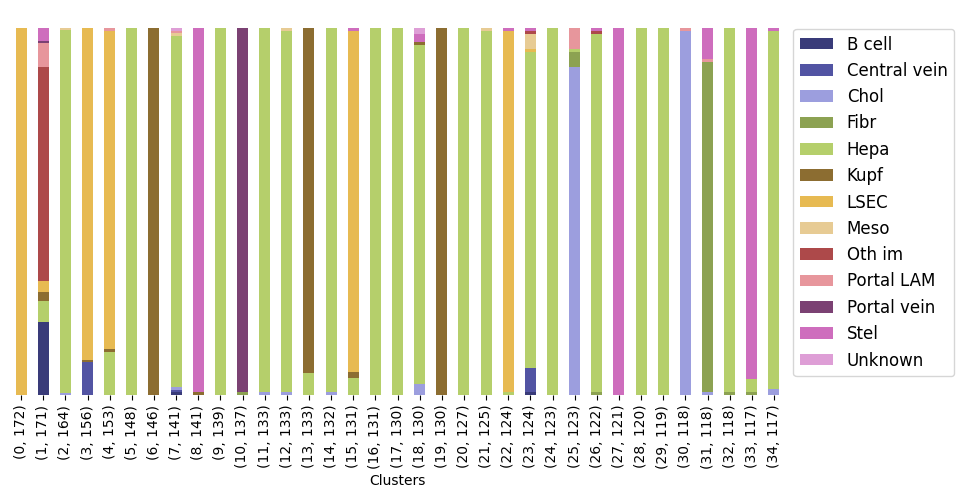

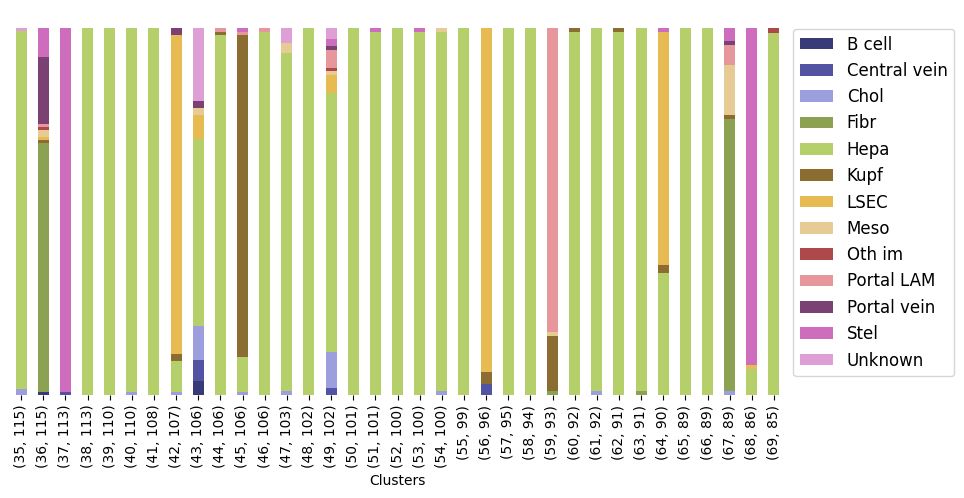

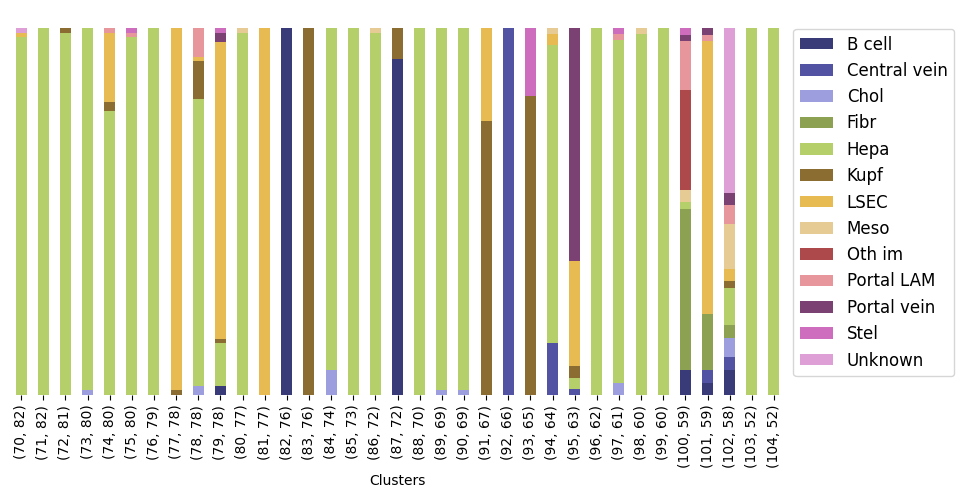

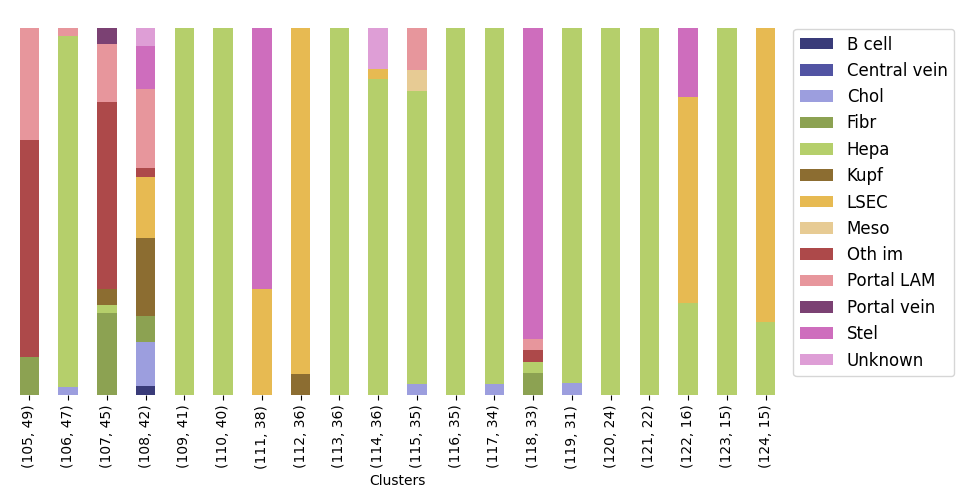

Fraction of cells in a Leiden cluster with unknown cell type:
1.409
Average cluster homogeneity:
0.915
Average cluster homogeneity per cell_type:
B cell: 0.96
Central vein: 1.0
Chol: 0.94
Fibr: 0.773
Hepa: 0.965
Kupf: 0.913
LSEC: 0.865
Meso: nan
Oth im: 0.56
Portal LAM: 0.83
Portal vein: 0.81
Stel: 0.917
Unknown: 0.367


Correlation between cell type scores:


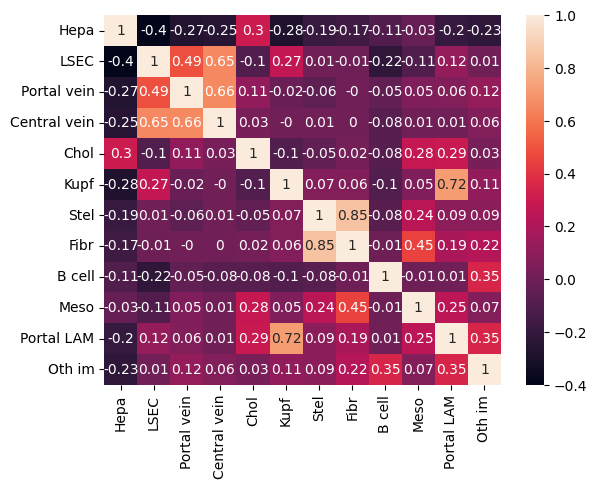

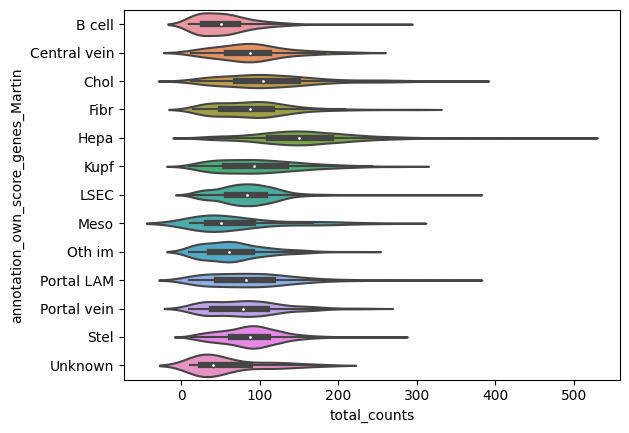

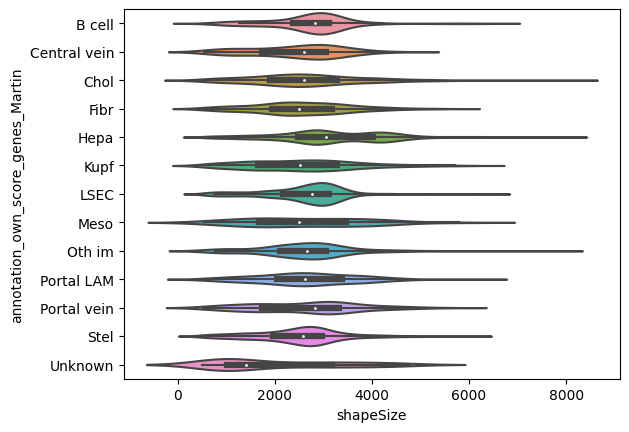

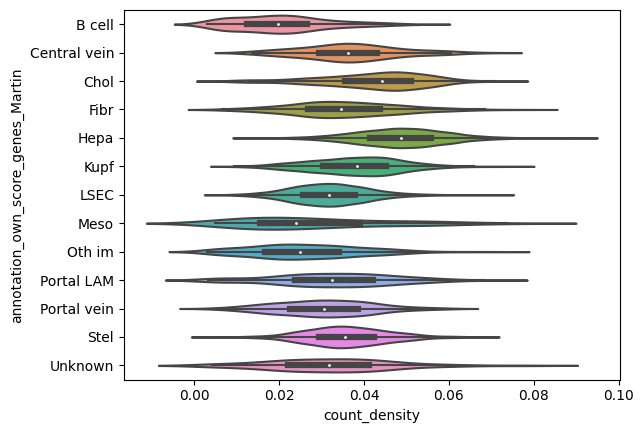

In [11]:
# ANNOTATION AT THE END OF THE ITERATIVE PROCESS
visualize_classification(anndata,'own_score_genes_Martin','umap_15',path_mg_Martin,plot_dot_plot=False,plot_rank_genes_groups=False)

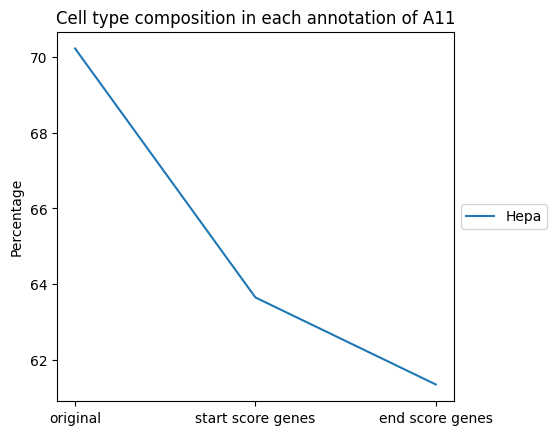

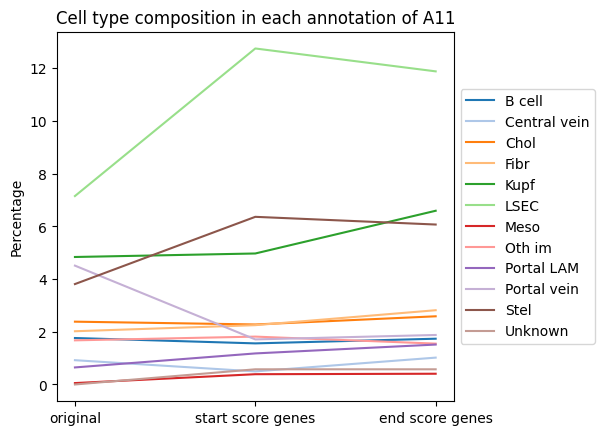

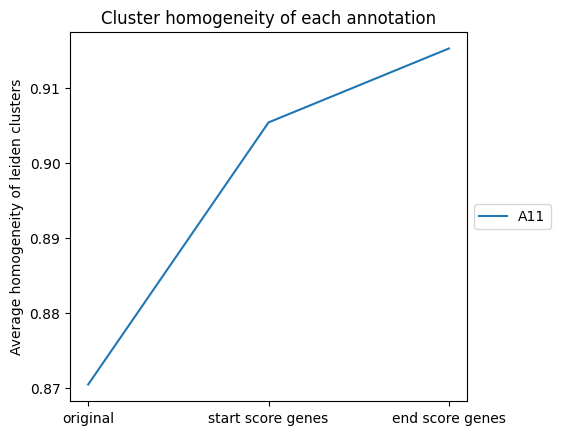

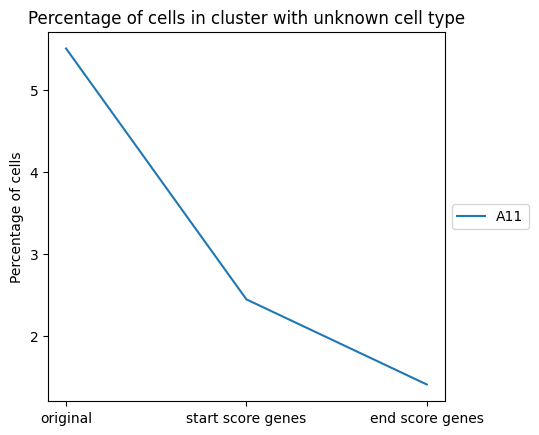

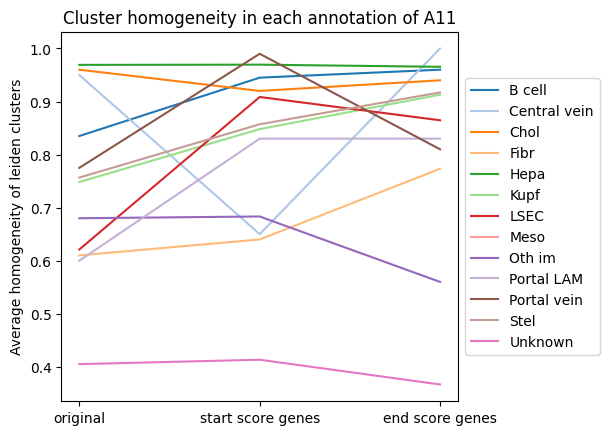

In [12]:
annotations = ['annotation_score_genes_original_Martin','annotation_own_score_genes_start_iterative_Martin','annotation_own_score_genes_Martin']
names_anno_plot = ['original','start score genes','end score genes']
proportions_annotations_Hepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['LSEC','Kupf','Stel','B cell','Chol','Central vein','Fibr','Meso','Oth im','Portal LAM','Portal vein','Unknown'])
proportions_annotations_noHepa = compare_annotations_composition(anndata,short_name,annotations,names_anno_plot,drop_cell_types=['Hepa'])
avg_homog_annotations = compare_annotations_samples_cluster_homogeneity([anndata],[short_name],annotations,names_anno_plot,drop_cell_types=[])
perc_cells_in_unknown_leiden_cl = compare_annotations_samples_cluster_homogeneity_percentage_unknown([anndata],[short_name],annotations,names_anno_plot)
homog_per_ct_annotations = compare_annotations_cluster_homogeneity(anndata,short_name,annotations,names_anno_plot,drop_cell_types=[])

In [51]:
# PART 2
# Start from the iterative score genes annotation of part 1 to assign cell types to leiden clusters
# Apply two strategies to change the marker gene list
# Do the original and new score genes again with the new marker gene list

In [53]:
leiden_clusters_per_ct = clusteringVSleiden(anndata,"annotation_own_score_genes_Martin", "leiden",cell_types=cell_types,print_results=False)

13


In [52]:
cell_types = anndata.obs['annotation_own_score_genes_Martin'].unique().tolist()  
a = anndata.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x[0]) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
anndata.obs['leiden_cell_types'] = a
print(anndata.obs['leiden_cell_types'].value_counts())

Hepa            7029
LSEC            1388
Kupf             723
Stel             649
Fibr             322
Oth im           265
Chol             241
Portal vein      200
Unknown          159
B cell           148
Portal LAM        93
Central vein      66
Name: leiden_cell_types, dtype: int64


In [54]:
# get index of 'Unknown' in cell_types
idx = cell_types.index('Unknown')
leiden_clusters_per_ct.pop(idx)

[(100, 0.44, 59), (102, 0.45, 58), (108, 0.21, 42)]

66 cells randomly sampled from each cell type in every iteration to do the DEG analysis
Summary:
Central vein
Maybe drop:[['Pecam1', 'LSEC'], ['Plpp1', 'Portal vein'], ['Plpp1', 'Kupf'], ['Pecam1', 'Kupf'], ['Rspo3', 'Fibr'], ['Plpp1', 'Fibr'], ['Plpp1', 'Meso'], ['Cd9', 'Portal LAM']]
LSEC
Maybe drop:[['Lyve1', 'Kupf'], ['Plpp1', 'Kupf'], ['Pecam1', 'Kupf'], ['Stab2', 'Kupf'], ['Plpp1', 'Fibr'], ['Plpp1', 'Meso']]
Kupf
Maybe drop:[['Slc40a1', 'LSEC'], ['Sirpa', 'LSEC']]
Stel
Maybe drop:[['Slc40a1', 'LSEC'], ['Plpp1', 'Kupf'], ['Rspo3', 'Fibr'], ['Plpp1', 'Fibr'], ['Plpp1', 'Meso']]
Portal LAM
Maybe drop:[['Sirpa', 'LSEC']]
Portal vein
Maybe drop:[['Pecam1', 'Kupf'], ['Plpp1', 'Kupf'], ['Plpp1', 'Fibr'], ['Cd9', 'Portal LAM']]
Fibr
Maybe drop:[['Fn1', 'Chol'], ['Fn1', 'Stel']]
Chol
Maybe drop:[['Spp1', 'Portal LAM']]
B cell
Maybe drop:[['Pecam1', 'Kupf'], ['Itgb7', 'Oth im']]
Meso
Maybe drop:[['Plpp1', 'Kupf'], ['Plpp1', 'Fibr']]
Summary:
LSEC
Maybe drop:[['Lyve1', 'Kupf'], ['Plpp1', '

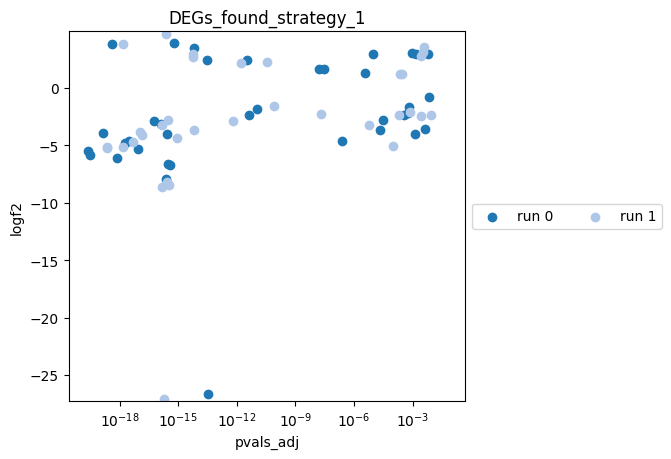

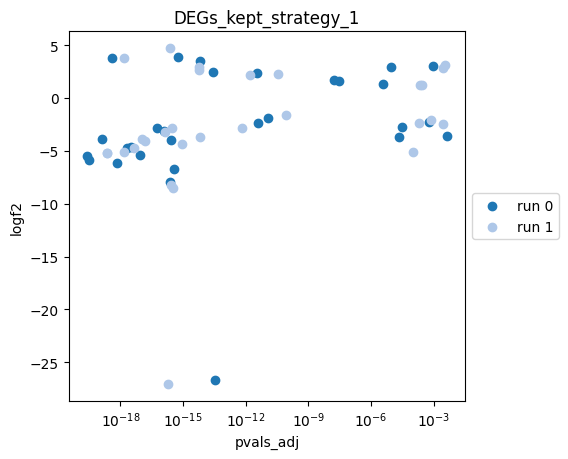

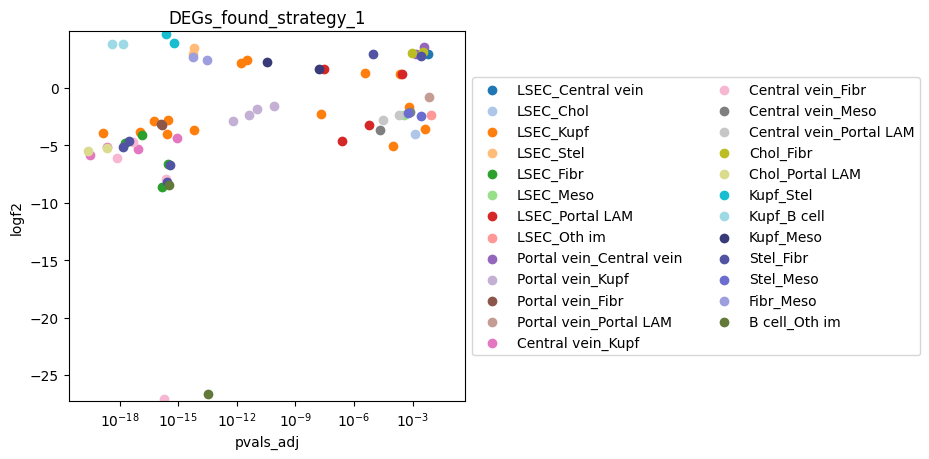

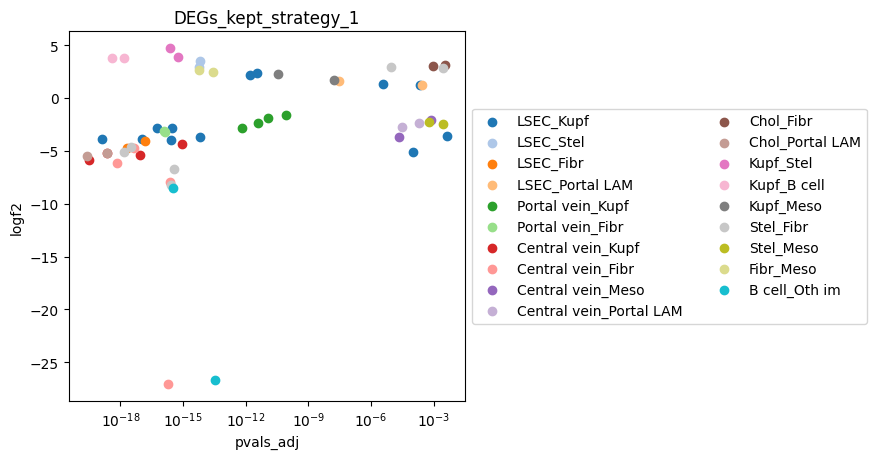

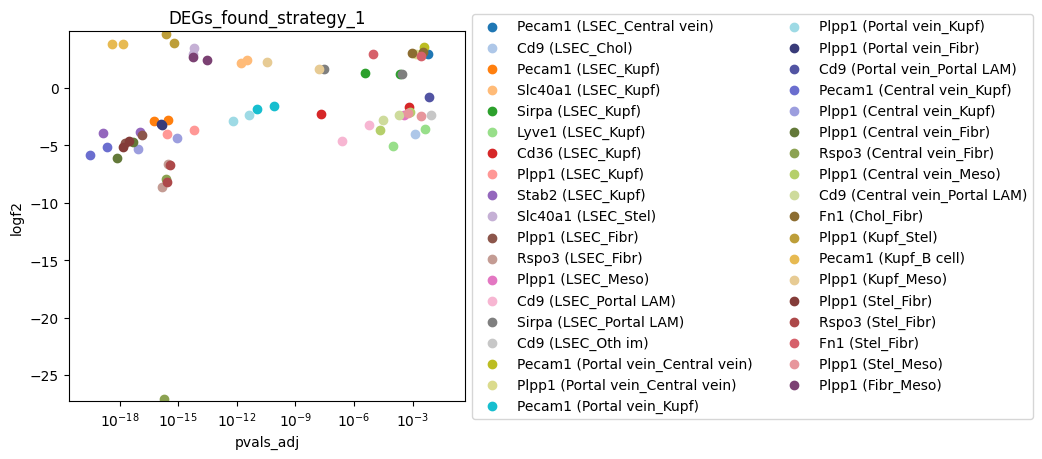

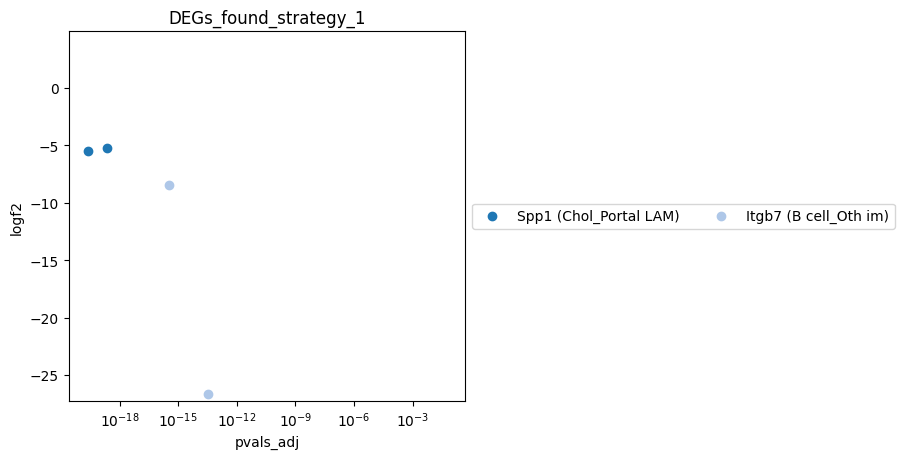

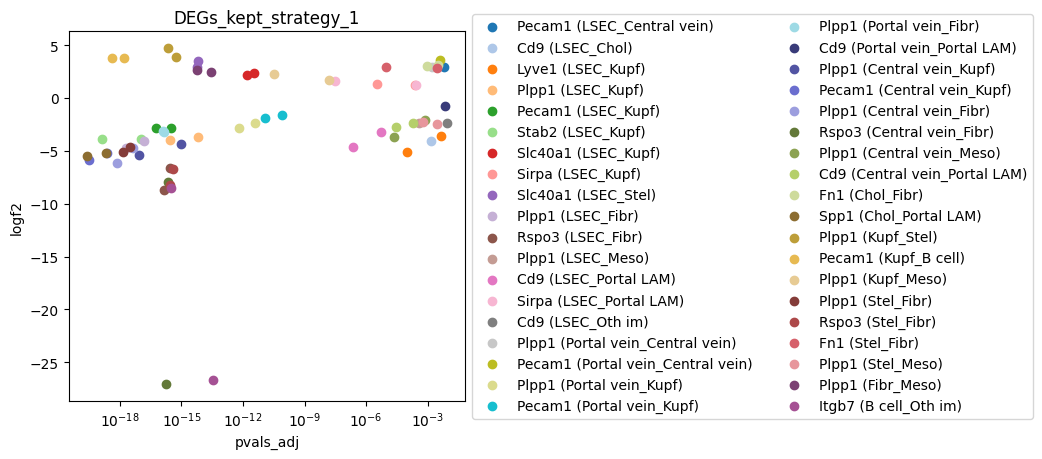

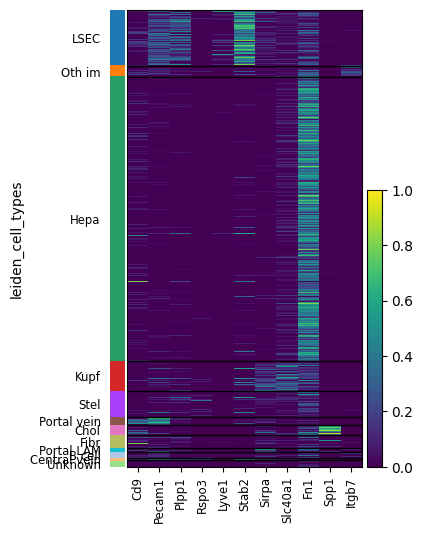

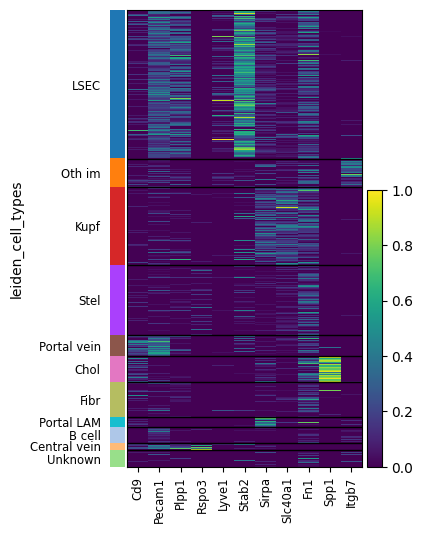

In [80]:
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(anndata,leiden_clusters_per_ct,path_mg_Martin,10,1,OUTPUT_DIR)

In [79]:
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(anndata,leiden_clusters_per_ct,path_mg_Martin,10,2,OUTPUT_DIR)

66 cells randomly sampled from each cell type in every iteration to do the DEG analysis
['6', '31', '2', '59', '0', '82', '92', '8', '10', '25', '1']
Acta2
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Portal vein']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Portal vein']
Adgre1
Is marker gene of: ['Kupf', 'Portal LAM']
Could also be a marker gene of: ['LSEC', 'Chol']
Adgrg6
Is marker gene of: ['LSEC', 'Portal vein', 'Chol', 'Fibr']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf', 'Stel', 'Fibr', 'Portal LAM']
Could also be a marker gene of: ['LSEC', 'Portal vein', 'Chol']
C5ar1
Is marker gene of: ['Kupf', 'Portal LAM']
Could also be a marker gene of: ['Chol']
Ccr2
Is marker gene of: ['Portal LAM']
Could also be a marker gene of: ['Chol', 'Oth im']
Ccr7
Is marker gene of: ['B cell']
Could also be a marker gene of: ['Stel']
Cd19
Is marker gene of: ['B cell']
Could also be a marker gene of: ['Stel']
Cd207
Is mark

KeyboardInterrupt: 